In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

# 実装

https://qiita.com/ctgk/items/794ae32e9f9f154435ee 参照。


PRML：　分散パラメタ関係 

-> 分散が小さいと系列が相関を持ってしまう。

-> 分散が大きいと棄却する確率が高くなる。


In [71]:
class MetroPolis():
    
    def __init__(self, random_var = 2,thin= 10):
        
        # 正規乱数の分散
        self.random_var = random_var
        
        # まびく間隔
        self.thin = thin
        
        # 初期値
        self.param = 10
        
        # サンプル列を入れておく
        self.samples = []
        
        
    def __call__(self, func, iter_len = 10000, burn_in = 100):
        # まず初期値の確率密度を計算
        
        for i in range(iter_len):
            prob_dense = func(self.param)
            new_param = self.param +np.random.normal(loc= 0,scale=self.random_var)
            new_prob_dense = func(new_param)

            accept_prob = new_prob_dense/prob_dense
            if accept_prob > np.random.uniform(low=0.0, high=1.0):
                self.param = new_param
                if i%self.thin ==1:
                    self.samples.append(self.param)
                
        return self.samples[burn_in:]

# 既知の分布からのサンプリング

In [73]:
mus = 5
sigmas = 1

def pgauss(x):
    return norm.pdf(x=x, loc=mus, scale=sigmas)


mh_sampler = MetroPolis()

samples = mh_sampler(pgauss)

In [74]:
np.var(samples, ddof=1)

1.0603483074134812

In [75]:

np.mean(samples)


4.9921663743227098

(array([  1.,   3.,  17.,  58.,  93.,  90.,  85.,  40.,   8.,   3.]),
 array([ 1.33190828,  2.02272542,  2.71354256,  3.4043597 ,  4.09517684,
         4.78599398,  5.47681112,  6.16762826,  6.8584454 ,  7.54926254,
         8.24007968]),
 <a list of 10 Patch objects>)

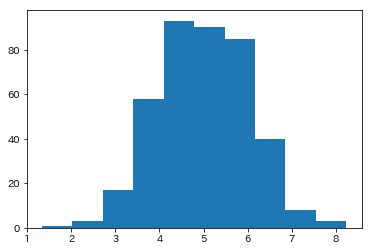

In [76]:
plt.hist(samples)

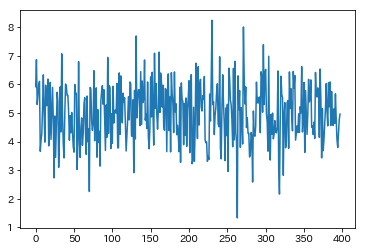

In [77]:
plt.plot([i for i in range(len(samples))], samples)